### Fashion Jerry

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
fashion = pd.read_csv('Amazon_Fashio.csv')

In [4]:
fashion.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,Color:,Size:
0,0,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Orange,Big Boys
1,1,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Black (37467610) / Red/White,Big Boys
2,2,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Gray Logo,Big Boys
3,3,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue (37867638-99) / Yellow,Big Boys
4,4,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Pink,Big Boys


In [5]:
fashion = fashion.drop('Unnamed: 0', axis=1)
fashion = fashion.rename(columns={"overall":"productRating","asin":"productID", "Size:":"size"})

In [6]:
fashion['reviewTime'] = pd.to_datetime(fashion['reviewTime'])

### Datetime Analysis

##### Amount of reviews per year and month

In [11]:
fashion['year'] = fashion['reviewTime'].dt.year
fashion['month'] = fashion['reviewTime'].dt.month
fashion['day'] = fashion['reviewTime'].dt.day

In [19]:
fashion['year_month'] = fashion['reviewTime'].apply(lambda x: x.strftime('%B-%Y'))

In [20]:
fashion.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,Color:,size,year,month,day,year_month
0,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Orange,Big Boys,2015,9,4,September-2015
1,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Black (37467610) / Red/White,Big Boys,2015,9,4,September-2015
2,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Gray Logo,Big Boys,2015,9,4,September-2015
3,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue (37867638-99) / Yellow,Big Boys,2015,9,4,September-2015
4,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Pink,Big Boys,2015,9,4,September-2015


In [24]:
review_count_m_y  = fashion.groupby(['year_month']).count()[['reviewText']]
review_count_m_y

,reviewText
year_month,
April-2016,48
April-2017,206
April-2018,128
August-2014,2
August-2016,91
August-2017,152
December-2009,4
December-2012,4
December-2014,6


##### Average rating per year and month

In [25]:
avg_rating_m_y = fashion.groupby(['year_month']).mean()[['productRating']]
avg_rating_m_y

,productRating
year_month,
April-2016,4.333333
April-2017,4.669903
April-2018,4.470588
August-2014,5.000000
August-2016,4.648352
August-2017,4.105263
December-2009,4.000000
December-2012,3.000000
December-2014,4.000000


##### Visualise findings

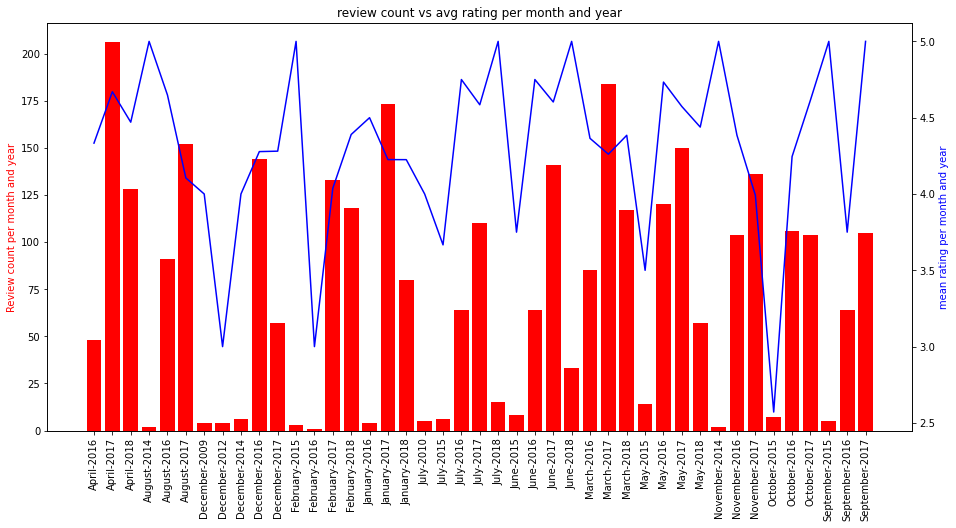

In [115]:
axes1 = review_count_m_y
axes2 = avg_rating_m_y

key = [key for key, df in fashion.groupby('year_month')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.reviewText, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90)
ax1.set_ylabel('Review count per month and year', color = 'r')
ax2.set_ylabel('mean rating per month and year', color = 'b')
ax1.set_title('review count vs avg rating per month and year')
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
fig.savefig('test2png.png', dpi=100)
plt.show()

### Simple sentiment analysis

In [42]:
from textblob import TextBlob

In [43]:
# get polarity of the text
def the_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

# add label to the polarity
def the_sentiment_label(text):
    if the_sentiment(text)>0:
        polarity_label = 'positive'
    elif the_sentiment(text)<0:
        polarity_label = 'negative'
    else:
        polarity_label = 'neutral'
    return polarity_label

In [44]:
print(the_sentiment("Mangoes are useless"))
print(the_sentiment_label("Mangoes are useless"))
print(the_sentiment("I love mangoes, it is a nice fruit"))
print(the_sentiment_label("I love mangoes, it is a nice fruit"))
print(the_sentiment ("I like mangoes"))
print(the_sentiment_label("I like mangoes"))

-0.5
negative
0.55
positive
0.0
neutral


#### add columns: sentiment and sentimentLabel

In [45]:
fashion['reviewText'] = fashion['reviewText'].astype(str)
fashion['sentiment'] = fashion['reviewText'].apply(the_sentiment)
fashion['sentimentLabel'] = fashion['reviewText'].apply(the_sentiment_label)

In [46]:
fashion.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,Color:,size,year,month,day,year_month,sentiment,sentimentLabel
0,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Orange,Big Boys,2015,9,4,September-2015,1.0,positive
1,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Black (37467610) / Red/White,Big Boys,2015,9,4,September-2015,1.0,positive
2,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Gray Logo,Big Boys,2015,9,4,September-2015,1.0,positive
3,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue (37867638-99) / Yellow,Big Boys,2015,9,4,September-2015,1.0,positive
4,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Pink,Big Boys,2015,9,4,September-2015,1.0,positive


#### Number of each label

In [58]:
fashion.groupby(['sentimentLabel']).count()[['sentiment']]

,sentiment
sentimentLabel,
negative,198
neutral,178
positive,2800


#### Visualise productRating vs sentiment

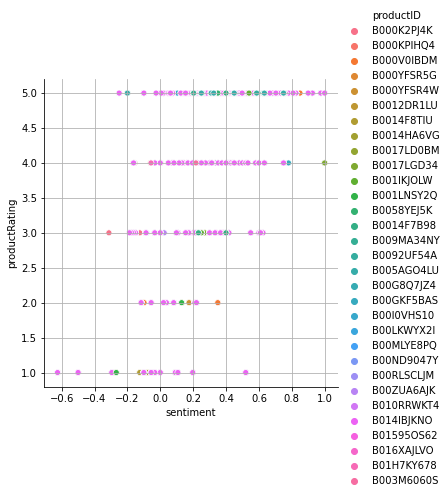

In [95]:
sns.relplot(x = 'sentiment', y='productRating', hue = 'productID', data = fashion)
plt.grid()
plt.show()

#### Find Number of genuine good, bad and neutral ratings

In [73]:
genuine_good_rating = fashion[(fashion['sentimentLabel']=='positive') & (fashion['productRating']>3)]
len(genuine_good_rating)

2439

In [74]:
genuine_bad_rating = fashion[(fashion['sentimentLabel']=='negative') & (fashion['productRating']<3)]
len(genuine_bad_rating)

83

In [75]:
genuine_neutral_rating = fashion[(fashion['sentimentLabel']=='neutral') & (fashion['productRating']==3)]
len(genuine_neutral_rating)

20

### Analysis on Product (productID)

#### Number of products

In [77]:
len(fashion.groupby('productID'))

31

#### Number of reviews per product

In [78]:
fashion.groupby('productID').count()[['reviewText']]

,reviewText
productID,
B000K2PJ4K,10
B000KPIHQ4,7
B000V0IBDM,7
B000YFSR4W,36
B000YFSR5G,56
B0012DR1LU,4
B0014F7B98,374
B0014F8TIU,8
B0014HA6VG,4


#### Sort review count per product

In [79]:
fashion.groupby('productID').count()[['reviewText']].sort_values('reviewText', ascending=False)

,reviewText
productID,
B009MA34NY,377
B005AGO4LU,376
B010RRWKT4,376
B0092UF54A,376
B014IBJKNO,375
B0014F7B98,374
B0058YEJ5K,367
B001IKJOLW,365
B000YFSR5G,56


#### Sentiment Label per product

In [90]:
idky = fashion.groupby(['productID', 'sentimentLabel']).count()[['sentiment']]
idky['sentimentLabel'] = idky.index.get_level_values(1)
idky.

sentiment sentimentLabel
productID  sentimentLabel                          
B000K2PJ4K negative                2       negative
           positive                8       positive
B000KPIHQ4 negative                1       negative
           positive                6       positive
B000V0IBDM negative                1       negative
...                              ...            ...
B014IBJKNO neutral                21        neutral
           positive              332       positive
B01595OS62 positive                1       positive
B016XAJLVO positive                1       positive
B01H7KY678 negative                1       negative

[62 rows x 2 columns]

In [92]:
idky['productID']=idky.index.get_level_values(0)
idky

sentiment sentimentLabel   productID
productID  sentimentLabel                                      
B000K2PJ4K negative                2       negative  B000K2PJ4K
           positive                8       positive  B000K2PJ4K
B000KPIHQ4 negative                1       negative  B000KPIHQ4
           positive                6       positive  B000KPIHQ4
B000V0IBDM negative                1       negative  B000V0IBDM
...                              ...            ...         ...
B014IBJKNO neutral                21        neutral  B014IBJKNO
           positive              332       positive  B014IBJKNO
B01595OS62 positive                1       positive  B01595OS62
B016XAJLVO positive                1       positive  B016XAJLVO
B01H7KY678 negative                1       negative  B01H7KY678

[62 rows x 3 columns]

#### Visualise findings

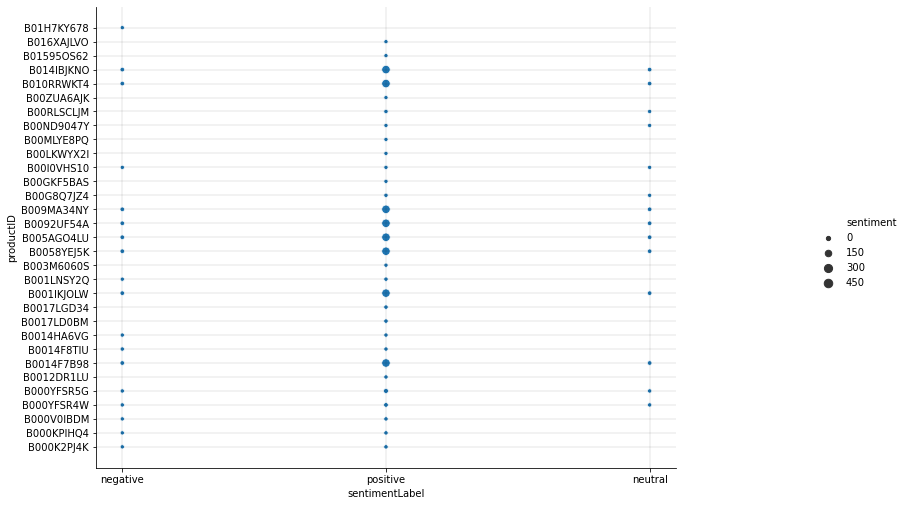

In [104]:
sns.relplot(x = 'sentimentLabel', y='productID', size ='sentiment', data = idky)
# plt.scatter(x = fashion['sentimentLabel'], y=fashion['productID'], s = idky['sentiment'])
plt.grid(color='black', linestyle='-', linewidth=0.1)
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
fig.savefig('test2png.png', dpi=100)
plt.show()

### Analysis on reviewers (reviewerID)

#### Number of reviewers

In [105]:
len(fashion.groupby('reviewerID'))

406

#### Review count per reviewer

In [108]:
fashion.groupby('reviewerID').count()[['reviewText']].sort_values('reviewText',ascending=False)

,reviewText
reviewerID,
AT7UEQ7UJB0RU,16
A37K0VP2H8FKOU,16
A3OP70LPLALBKN,16
A3BN0MRGRDKM0J,10
A2YI41MCJB2QCV,9
...,...
A3GJ3DJU1RXOHN,5
AGZ5OOZVDO194,5
A3LJRA2I5F34W5,5


### Most review done in a day per ID

In [9]:
time_id = fashion.groupby(['reviewTime', 'reviewerID']).count().sort_values('productRating', ascending=False)

In [10]:
time_id[['productRating']]

,,productRating
reviewTime,reviewerID,
2017-03-08,A37K0VP2H8FKOU,16
2017-11-27,A3OP70LPLALBKN,16
2017-05-19,AT7UEQ7UJB0RU,16
2018-02-01,A3VGHF7VNFBMCQ,9
2017-04-14,AFD4WKNPLPS3I,8
...,...,...
2017-07-25,A3UTTXFSBNV2V7,1
2016-02-14,A2YI41MCJB2QCV,1
2017-07-19,A12DWXDNZQTKXQ,1


### Analysis on product ratings (productRating)
#### visualize


In [111]:
axes1 = fashion.groupby('productID').count()
axes2 = fashion.groupby('productID').mean()

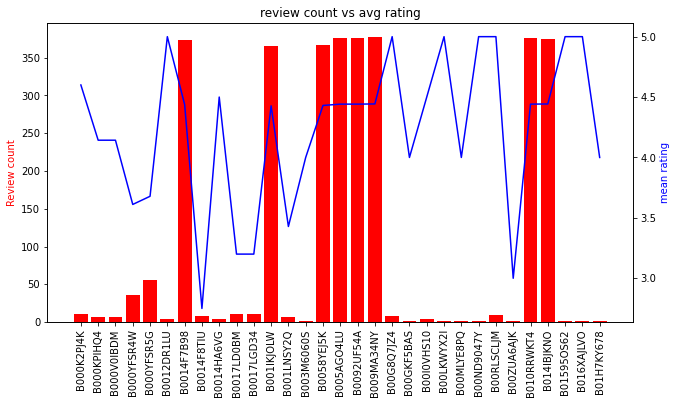

In [114]:
key = [key for key, df in fashion.groupby('productID')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.productRating, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90)
ax1.set_ylabel('Review count', color = 'r')
ax2.set_ylabel('mean rating', color = 'b')
ax1.set_title('review count vs avg rating')
fig = plt.gcf()
fig.set_size_inches(10.5, 5.5)
fig.savefig('test2png.png', dpi=100)
plt.show()